<a href="https://colab.research.google.com/github/vs79284/covid-19/blob/master/covid_19_detection_using_chest_x_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import shutil
##print(os.listdir("/content/gdrive/MyDrive/ms/covid19/Dataset"))
## Mount the google drive 
from google.colab import drive
drive.mount('/content/gdrive')
data_path = '/content/gdrive/MyDrive/ms/covid19/Dataset'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Load Datasets

In [ ]:
TRAIN_PATH = "/content/gdrive/MyDrive/ms/covid19/Dataset/Train"
VAL_PATH = "/content/gdrive/MyDrive/ms/covid19/Dataset/Val"

# **Importing Required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# **Building Architecture**


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

# **Train From Scratch**

## *Data Augmentation*

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/ms/covid19/Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/gdrive/MyDrive/ms/covid19/Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


# **Fit The Model**

In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 92s 11s/step - loss: 0.8847 - accuracy: 0.5195 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 89s 11s/step - loss: 0.6871 - accuracy: 0.5859 - val_loss: 0.6880 - val_accuracy: 0.8833
Epoch 3/10
8/8 [==============================] - 89s 11s/step - loss: 0.6162 - accuracy: 0.6562 - val_loss: 0.5316 - val_accuracy: 0.9833
Epoch 4/10
8/8 [==============================] - 89s 11s/step - loss: 0.3990 - accuracy: 0.8203 - val_loss: 0.2384 - val_accuracy: 0.9833
Epoch 5/10
8/8 [==============================] - 89s 11s/step - loss: 0.3189 - accuracy: 0.8359 - val_loss: 0.2630 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 87s 11s/step - loss: 0.2483 - accuracy: 0.9297 - val_loss: 0.2326 - val_accuracy: 0.9833
Epoch 7/10
8/8 [==============================] - 89s 11s/step - loss: 0.2794 - accuracy: 0.8867 - val_loss: 0.2289 - val_accuracy: 0.9833
Epoch 8/10
8/8 [===========

## *Loss is very less and accuracy is on point*

In [ ]:
model.save("Detection_Covid_19.h5")

In [ ]:
# model.evaluate_generator(train_generator)

In [ ]:
# model.evaluate_generator(validation_generator)

# **Test Images**

In [ ]:
model = load_model("Detection_Covid_19.h5")

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

# **Confusion Matrix**

In [ ]:
y_actual = []
y_test = []

In [ ]:
for i in os.listdir("/content/gdrive/MyDrive/ms/covid19/Dataset/Val/Normal"):
  img = image.load_img("/content/gdrive/MyDrive/ms/covid19/Dataset/Val/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
for i in os.listdir("/content/gdrive/MyDrive/ms/covid19/Dataset/Val/Covid"):
  img = image.load_img("/content/gdrive/MyDrive/ms/covid19/Dataset/Val/Covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_actual


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
cm = confusion_matrix(y_actual,y_test)

In [ ]:
import seaborn as sns

In [ ]:
# sns.heatmap(cm,cmap = "plasma" , annot=True)

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## ***Confusion Matrix***

Confusion matrix, without normalization
[[25  5]
 [ 0 30]]


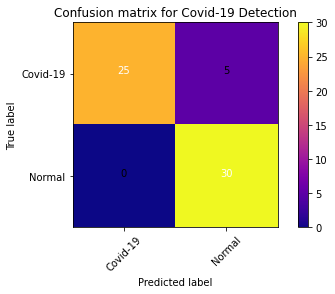

In [ ]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")


# **List all data in history**

In [ ]:

history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **Summarize history for accuracy**

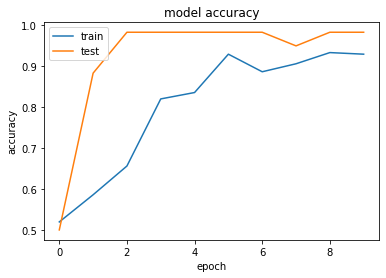

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# **Summarize history for loss**

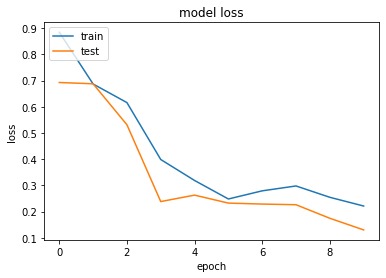

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Predictions from X-Ray Images**

In [ ]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image
xtest_image = image.load_img('/content/gdrive/MyDrive/ms/covid19/Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
# training_set.class_indices
imggg = cv2.imread('Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
down_width = 400
down_height = 400
down_points = (down_width, down_height)
#imggg = cv2.resize(imggg, 400,400)
#plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


In [ ]:
import numpy as np
# from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = image.load_img('/content/gdrive/MyDrive/ms/covid19/Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
# training_set.class_indices

# imggg = cv2.imread('Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg')
# print("This Xray Image is of Negative covid-19 patient")
# imggg = np.array(imggg)
# imggg = cv2.resize(imggg,(400,400))

# plt.imshow(imggg)
# cv2_imshow(imggg)
print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

[[1.]]
Prediction Of Our Model :  Negative for Covid-19
